# Análise de Vendas


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Temos 12 meses de informações sobre as vendas (cada mês é um .csv) e queremos unir-las em um único arquivo .csv

In [2]:
arqvs = [arqv for arqv in os.listdir('./SalesAnalysis/Sales_Data')]

todos_meses = pd.DataFrame()

for arqv in arqvs:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/'+arqv)
    todos_meses = pd.concat([todos_meses, df])
    
todos_meses.to_csv('Vendas.csv',index=False)

#####  Ler o arquivo direto

In [ ]:
df_vendas = pd.read_csv('Vendas.csv')

In [ ]:
df_vendas = df_vendas.dropna(how='all')  ## excluindo as linhas com NaN

### Questão 1: Qual foi o mês com maior lucro? E quanto que foi?

Separando os dados por mês

In [ ]:
df_vendas = df_vendas[df_vendas['Order Date'].str[0:2] != 'Or'] #alguns dados possuiam a str 'Or' no lugar do dia

In [ ]:
df_vendas['Order Date'] = pd.to_datetime(df_vendas['Order Date'],errors='coerce',dayfirst=True)

In [ ]:
df_vendas['Month'] = df_vendas['Order Date'].apply(lambda x : x.month)

#### convertendo o type para int

In [ ]:
df_vendas['Price Each'] = pd.to_numeric(df_vendas['Price Each'])
df_vendas['Quantity Ordered'] = pd.to_numeric(df_vendas['Quantity Ordered'])

In [ ]:
df_vendas['Total Price'] = df_vendas['Price Each']*df_vendas['Quantity Ordered']

In [9]:
df_Month = df_vendas.groupby(by=['Month']).sum()

In [10]:
df_Month

,Quantity Ordered,Price Each,Total Price
Month,,,
1,13595,2.272978e+06,2.286906e+06
2,14729,2.379063e+06,2.394467e+06
3,16930,2.776899e+06,2.793085e+06
4,19150,3.209758e+06,3.229765e+06
5,18338,3.014144e+06,3.033276e+06
6,15911,2.670458e+06,2.684603e+06
7,16613,2.707821e+06,2.721873e+06
8,15101,2.429610e+06,2.447042e+06
9,14709,2.400693e+06,2.413751e+06


#### Qual o Mês que vendeu mais:

In [11]:
df_Month['Total Price'].idxmax()

12

#### Quanto que se obteve:

In [12]:
df_Month['Total Price'].max()

3925406.8400010862

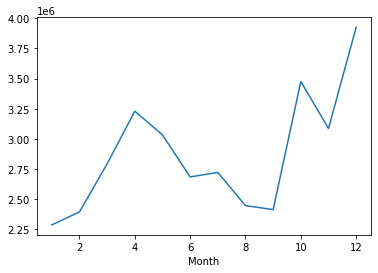

In [13]:
df_Month['Total Price'].plot()

[(2000000.0, 4000000.0), Text(0, 0.5, 'Preço total'), Text(0.5, 0, 'Mês')]

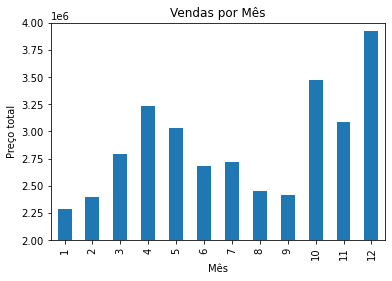

In [14]:
df_Month['Total Price'].plot.bar(title='Vendas por Mês').set(xlabel='Mês', ylabel='Preço total',ylim=(2e6,4e6))

Podemos ver então que obeteve-se maiores vendas nos meses de Abril, Outubro, Novembro e Dezembro. Nos dois últimos esta alta pode ser explicada a partir dos feriados nos EUA (de onde os dados foram tirados), como o dia de ação de graças e o natal, já os demais necessitaria de mais informações para fazer uma melhor análise.

### Questão 2: Qual cidade teve o maior número de vendas?

#### Pegando a cidade do 'Purchase Address'

Gambiarra para fazer uma coluna com: 'Cidade ESTADO'

In [ ]:
df_vendas['City_tmp'] = df_vendas['Purchase Address'].str.split(', ',expand=True)[1]

In [ ]:
State_tmp = df_vendas['Purchase Address'].str.split(', ',expand=True)[2]

In [ ]:
df_vendas['State_tmp'] = State_tmp
df_vendas['State_tmp'] = State_tmp.str.split(' ',expand=True) 

In [ ]:
df_vendas['City'] = df_vendas['City_tmp'] + ' ' + df_vendas['State_tmp']

In [ ]:
df_vendas = df_vendas.drop(['City_tmp','State_tmp'], axis=1)

In [20]:
df_vendas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


Criando o novo DataFrame mas com a cidades como indice

In [21]:
df_City = df_vendas.groupby(by=['City']).sum()

In [22]:
df_City

,Quantity Ordered,Price Each,Month,Total Price
City,,,,
Atlanta GA,16602,2.779908e+06,102054,2.795499e+06
Austin TX,11153,1.809874e+06,68428,1.819582e+06
Boston MA,22528,3.637410e+06,137528,3.661642e+06
Dallas TX,16730,2.752628e+06,101376,2.767975e+06
Los Angeles CA,33289,5.421435e+06,202471,5.452571e+06
New York City NY,27932,4.635371e+06,170626,4.664317e+06
Portland ME,2750,4.471893e+05,16601,4.497583e+05
Portland OR,11303,1.860558e+06,68813,1.870732e+06
San Francisco CA,50239,8.211462e+06,306750,8.262204e+06


#### A cidade na qual mais se vendeu foi:

In [23]:
df_City['Quantity Ordered'].idxmax()

'San Francisco CA'

#### Quantos produtos foram vendidos nela:

In [24]:
df_City['Quantity Ordered'].max()

50239

[Text(0, 0.5, 'Quantidade pedida'), Text(0.5, 0, 'Cidade')]

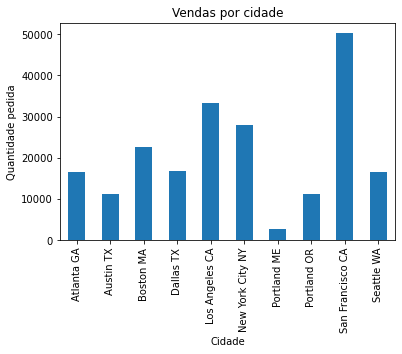

In [25]:
df_City['Quantity Ordered'].plot.bar(title='Vendas por cidade').set(xlabel='Cidade', ylabel='Quantidade pedida')

### Questão 3: Quanto tempo devemos ter de propaganda para maximizar as chances do consumidor comprar os produtos?

Para isto, olho o período do dia em que houveram mais vendas.

In [ ]:
df_vendas['Order Time'] = df_vendas['Order Date'].apply(lambda x: x.hour)

In [27]:
df_Hour = df_vendas.groupby(by=['Order Time']).sum()

In [28]:
df_Hour.head()

,Quantity Ordered,Price Each,Month,Total Price
Order Time,,,,
0,4428,709296.70,27074,713721.27
1,2619,458490.00,16271,460866.88
2,1398,233833.64,8337,234851.44
3,928,144726.42,5704,145757.89
4,937,162058.18,5987,162661.01


#### Posso olhar tanto a quantidade de produtos vendida como o total arrecadado

Olhando para a quantidade vendida:

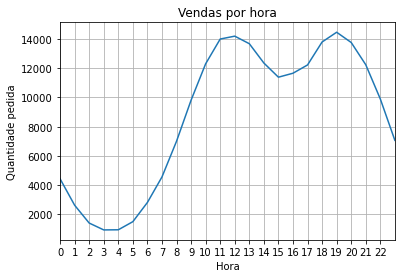

In [36]:
df_Hour['Quantity Ordered'].plot(title='Vendas por hora').set(xlabel='Hora', ylabel='Quantidade pedida',xlim=(0,23))
plt.xticks(np.arange(0,23,1))
plt.grid()

Temos então que tomando em conta apenas a quantidade vendida, os melhores horários para se ter propaganda é das 10h as 14h e das 18h as 21h

Agora olhando para o total arrecadado:

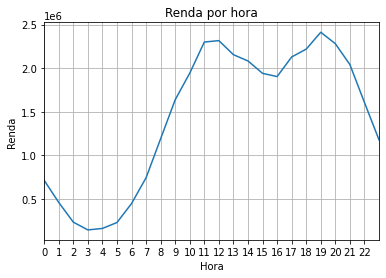

In [43]:
df_Hour['Total Price'].plot(title='Renda por hora').set(xlabel='Hora', ylabel='Renda',xlim=(0,23))
plt.xticks(np.arange(0,23,1))
plt.grid()

Esta análise obteve-se resultado semelhantes a anterior

### Questão 4: Quais pares de produtos mais costumam ser vendidos juntos?

Produtos vendidos juntos possuem o mesmo 'Order ID'

In [15]:
df_dup = df_vendas[df_vendas['Order ID'].duplicated(keep=False)]

df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-15-fc0723d997c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [16]:
df_dup = df_dup[['Order ID', 'Grouped']].drop_duplicates()

df_dup.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [17]:
from itertools import combinations
from collections import Counter

In [18]:
count = Counter()

for row in df_dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Questão 5: Qual produto vendeu mais e por que será?

In [54]:
df_pro = df_vendas.groupby('Product').sum()

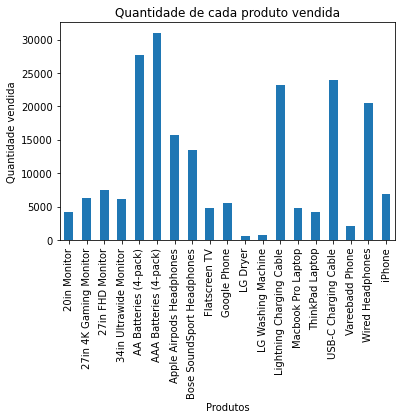

In [55]:
df_pro['Quantity Ordered'].plot.bar(title='Quantidade de cada produto vendida').set(xlabel='Produtos', ylabel='Quantidade vendida')
plt.show()

Os produtos mais vendidos são as pilhas AA e AAA isto devido ao seu baixo custo e alta necessidade de se ter várias para utilizar nos eletrodomésticos.

In [56]:
prices = df_vendas.groupby('Product').mean()['Price Each']

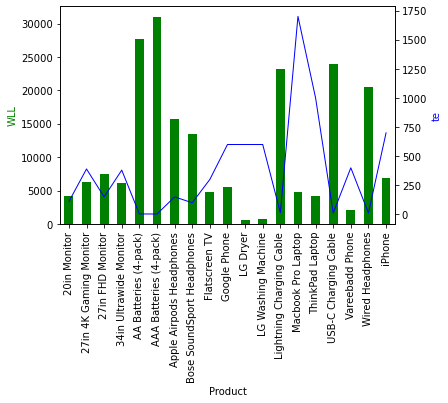

In [59]:
fig, ax1 = plt.subplots()

ax = df_pro['Quantity Ordered'].plot.bar(color='g')
ax.set_ylabel('WLL', fontsize=10,color='g');
ax2 = prices.plot(secondary_y=True, ax=ax1, color='b', linewidth=1.0)
ax2.set_ylabel('te',color='b')
ax.tick_params(axis='x', labelrotation = 90)

plt.show()